Step 1. Ensure that you have the dataset file named `transactions.csv` in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Step 2. Complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).

In [1]:
%pip install pandas
%pip install matplotlib

Use the empty cell to test the exercises. If you modify the original `df`, you can rerun the cell containing `exercise_0`.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

def exercise_0(file):
    return pd.read_csv(file) 

def exercise_1(df):
    return df.columns

def exercise_2(df, k):
    return df.head(k)

def exercise_3(df, k):
    return df.sample(k)

def exercise_4(df):
    return df['type'].unique()

def exercise_5(df):
    freq = df["nameDest"].value_counts()
    return freq[:10]

def exercise_6(df):
    return df.loc[df["isFraud"] == 1]

def exercise_7(df):
    return df.groupby(["nameDest"])["newbalanceDest"].agg("mean").sort_values(ascending=False)

def visual_1(df):
    def transaction_counts(df):
        # TODO
        return df["type"].value_counts()
    def transaction_counts_split_by_fraud(df):
        # TODO
        return df.groupby(by=["type" , "isFraud"]).size()

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Transaction types vs Occurence')
    axs[0].set_xlabel('Transaction Types')
    axs[0].set_ylabel('Occurrence')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Transaction types split by fraud bar chart')
    axs[1].set_xlabel('(Type , Fraud)')
    axs[1].set_ylabel('Occurrence')
    fig.suptitle('Transactions Chart')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    return 'The fraudulent activities in given dataset can only be seen while transactions like CASH_OUT or TRANSFER.'

def visual_2(df):
    def query(df):
        # TODO
        df["OriginDelta"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
        df["DestDelta"] = df["oldbalanceDest"] - df["newbalanceDest"]
        return df.loc[df["type"] == "CASH_OUT"]
    plot = query(df).plot.scatter(x='OriginDelta',y='DestDelta')
    plot.set_title('Origin account balance delta v. Destination account balance delta')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    return 'The line y=-x is particularly interesting as it is result of instantacnous settlement'

def exercise_custom(df):
    return df[["isFlaggedFraud" , "isFraud"]].value_counts()

def visual_custom(df):
    fig, ax = plt.subplots(1, figsize=(4,6))
    exercise_custom(df).plot(ax=ax, kind='bar')
    ax.set_title('Fraud Detection')
    ax.set_xlabel('isFlaggedFraud, isFraud')
    ax.set_ylabel('Occurrence')
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()))

    return "The Following graph shows how effective the fraud detection is."


In [2]:
# exercise 0
df = exercise_0('transactions.csv')
#print(df)
#exercise 1
column_names = exercise_1(df) 
print("Exercise 1 : " , column_names)

#exercise 2
K_rows = exercise_2(df , 10)
print("Exercise 2 : ")
print(K_rows , "\n")

#exercise 3
random_samples = exercise_3(df , 5)
print("Exercise 3 : ")
print(random_samples)

#exercise 4
unique_trans_type = exercise_4(df)
print("\n Exercise 4 : ")
print(unique_trans_type)

#exercise 5
top_10_dest_freq = exercise_5(df)
print("\n Exercise 5 : ")
print(top_10_dest_freq)

#exercise 6
Is_fraud = exercise_6(df)
print("\n Exercise 6 : ")
print(Is_fraud)

#exercise 7
Distinct_dest_trans = exercise_7(df)
print("\n Exercise 7 : ")
print(Distinct_dest_trans)


Exercise 1 :  Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')
Exercise 2 : 
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815      170136.00       160296.36   
1     1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2     1  TRANSFER    181.00  C1305486145         181.00            0.00   
3     1  CASH_OUT    181.00   C840083671         181.00            0.00   
4     1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
5     1   PAYMENT   7817.71    C90045638       53860.00        46042.29   
6     1   PAYMENT   7107.77   C154988899      183195.00       176087.23   
7     1   PAYMENT   7861.64  C1912850431      176087.23       168225.59   
8     1   PAYMENT   4024.36  C1265012928        2671.00            0.00   
9     1     DEBIT   5337.77 

In [7]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
199995,13,CASH_IN,149024.27,C1446913085,8688.0,157712.27,C476402209,440028.59,321427.51,0,0
199996,13,PAYMENT,71076.01,C1421983410,50291.0,0.00,M855368711,0.00,0.00,0,0
199997,13,CASH_OUT,147125.05,C80624764,0.0,0.00,C747330421,1058502.64,1325544.47,0,0
199998,13,CASH_OUT,97529.67,C595001108,0.0,0.00,C575555170,1921846.97,2019376.64,0,0


In [8]:
# Test exercises here
#df.groupby(["nameDest"])["newbalanceDest"].transform('nunique')
df["type"].value_counts()

type
PAYMENT     73427
CASH_OUT    66488
CASH_IN     41579
TRANSFER    16836
DEBIT        1670
Name: count, dtype: int64

Create graphs for the following. 
1. Transaction types bar chart, Transaction types split by fraud bar chart
1. Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions

Ensure that the graphs have the following:
 - Title
 - Labeled Axes
 
The function plot the graph and then return a string containing a short description explaining the relevance of the chart.

'The fraudulent activities in given dataset can only be seen while transactions like CASH_OUT or TRANSFER.'

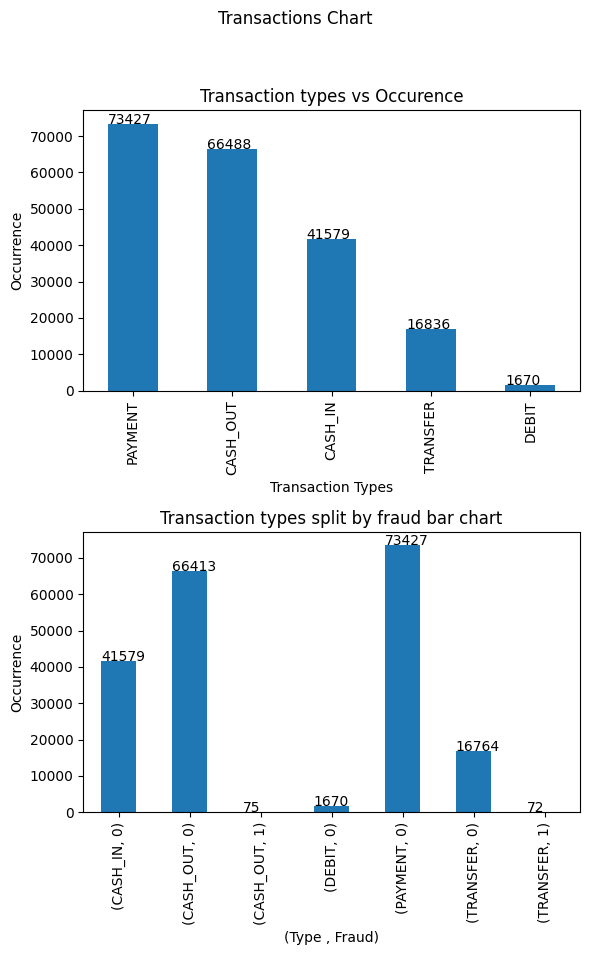

In [3]:
def visual_1(df):
    def transaction_counts(df):
        return df["type"].value_counts()
    def transaction_counts_split_by_fraud(df):
        return df.groupby(by=["type" , "isFraud"]).size()

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Transaction types vs Occurence')
    axs[0].set_xlabel('Transaction Types')
    axs[0].set_ylabel('Occurrence')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Transaction types split by fraud bar chart')
    axs[1].set_xlabel('(Type , Fraud)')
    axs[1].set_ylabel('Occurrence')
    fig.suptitle('Transactions Chart')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    return 'The fraudulent activities in given dataset can only be seen while transactions like CASH_OUT or TRANSFER.'

visual_1(df)


'The line y=-x is particularly interesting as it is result of instantacnous settlement'

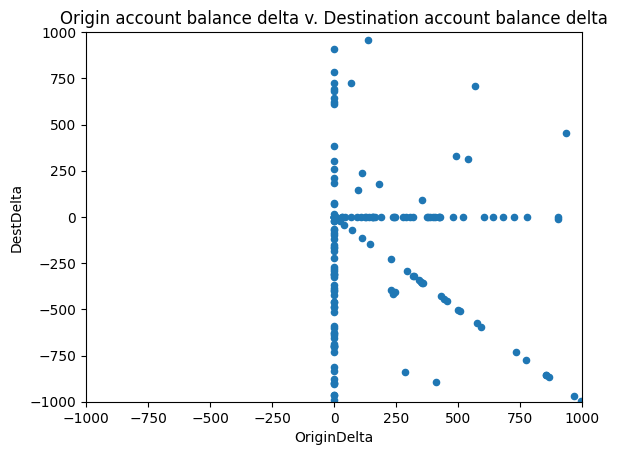

In [5]:
def visual_2(df):
    def query(df):
        df["OriginDelta"] = df["oldbalanceOrg"] - df["newbalanceOrig"]
        df["DestDelta"] = df["oldbalanceDest"] - df["newbalanceDest"]
        return df.loc[df["type"] == "CASH_OUT"]
    plot = query(df).plot.scatter(x='OriginDelta',y='DestDelta')
    plot.set_title('Origin account balance delta v. Destination account balance delta')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    return 'The line y=-x is particularly interesting as it is result of instantacnous settlement'

visual_2(df)


Use your newly-gained Pandas skills to find an insight from the dataset. You have full flexibility to go in whichever direction interests you. Please create a visual as above for this query. `visual_custom` should call `exercise_custom`.

'The Following graph shows how effective the fraud detection is.'

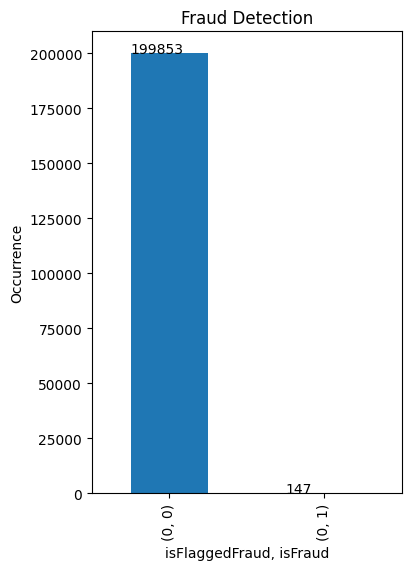

In [5]:
def exercise_custom(df):
    return df[["isFlaggedFraud" , "isFraud"]].value_counts()

def visual_custom(df):
    fig, ax = plt.subplots(1, figsize=(4,6))
    exercise_custom(df).plot(ax=ax, kind='bar')
    ax.set_title('Fraud Detection')
    ax.set_xlabel('isFlaggedFraud, isFraud')
    ax.set_ylabel('Occurrence')
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()))

    return "The Following graph shows how effective the fraud detection is."

visual_custom(df)
# exercise_custom(df)


Submission

1. Copy the exercises into `task1.py`.
2. Upload `task1.py` to Forage.

All done!

Your work will be instrumental for our team's continued success.